# Proyek Analisis Data: Bike Sharing Datset
- **Nama:** Muhammad Husni Zahran Nugrahanto
- **Email:** MHunsny1604@gmail.com
- **ID Dicoding:** mhznug

## Menentukan Pertanyaan Bisnis

- Bagaimana proporsi antara pengguna casual dan registered?
- Bagaimana pola peminjaman sepeda per bulan dan apakah terdapat perbedaan antara tahun yang berbeda?
- Bagaimana perbandingan peminjaman antara musim semi, panas, gugur, dan dingin?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
- Seberapa besar perbedaan peminjaman antara hari kerja dan hari libur?
- Bagaimana pengaruh faktor cuaca seperti temperatur, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/hayhalo/Final-Project-Analisis-Data-dengan-Python/refs/heads/main/Data/hour.csv')

# Mengubah nama kolom agar lebih mudah dipahami
df = df.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity', 'weathersit':'weather', 'cnt':'count', 'hr':'hour'})

# Melihat 5 data teratas
display(df.head())
print(df.shape)

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(17379, 17)


**Insight:**
- Dataset adalah data peminjaman sepeda yang dipantau setiap jam selam tahun 2011 dan 2012
- Dataset terdiri dari 17 kolom yang memuat kode unik, keterangan waktu, keterangan registrasi, indikator cuaca, dan jumlah peminjaman sepeda

### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
print("Jumlah data duplikat: ", df.duplicated().sum())

Jumlah data duplikat:  0


In [6]:
df.describe()

,instant,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data yang digunakan sudah lengkap tanpa nilai yang hilang dan duplikasi pada data
- Masih terdapat kolom yang tipe datanya kurang sesuai (misal: kolon `dteday` memiliki nilai beripa tanggal namun tipe datanya masih berupa object)

### Cleaning Data

Memeperbaiki Tipe Data

In [7]:
# Ubah kolom menjadi datetime
df['dteday'] = pd.to_datetime(df['dteday'])

In [8]:
# Ubah kolom menjadi kategori
df['year'] = df['dteday'].dt.year      
df['month'] = df['dteday'].dt.strftime('%B')
df['weekday'] = df['dteday'].dt.day_name() 
df['hour'] = pd.to_datetime(df['hour'], format='%H').dt.time

In [9]:
# Ubah kolom menjadi boolean
df['holiday'] = df['holiday'].astype('bool')
df['workingday'] = df['workingday'].astype('bool')

In [10]:
# Mapping season (1 → Spring, 2 → Summer, 3 → Fall, 4 → Winter)
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Mengganti angka pada kolom musim dengan label kategori
df['season'] = df['season'].map(season_map)

In [11]:
# MApping weather (1 → Clear/Few Clouds, 2 → Mist/Cloudy, 3 → Light Snow/Rain, 4 → Heavy Rain/Snow)
weather_map = {1: 'Clear/Few Clouds', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

# Mengganti angka pada kolom cuaca menjadi label kategori
df['weather'] = df['weather'].map(weather_map)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   year        17379 non-null  int32         
 4   month       17379 non-null  object        
 5   hour        17379 non-null  object        
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  bool          
 9   weather     17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

**Insight:**
- mengubah tipe data pada kolom `dteday` menjadi datetime
- mengubah tipe data pada kolom `year`, `month`, `weekday`, dan `hour` menjadi kategori
- mengubah tipe daya pada kolom `holiday` dan `workingday` menjadi boolean
- mengubah tipe data pada kolom `season` dan `weather` menjadi object sesuai dengan ketentuan dari datset

## Exploratory Data Analysis (EDA)

### Explore Hourly Bike Sharing 


In [13]:
df.sample(5)

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2450,2451,2011-04-17,Summer,2011,April,00:00:00,False,Sunday,False,Mist/Cloudy,0.44,0.4394,0.77,0.2836,4,29,33
7476,7477,2011-11-13,Winter,2011,November,03:00:00,False,Sunday,False,Mist/Cloudy,0.36,0.3485,0.62,0.1343,8,20,28
5384,5385,2011-08-17,Fall,2011,August,06:00:00,False,Wednesday,True,Clear/Few Clouds,0.62,0.5909,0.78,0.0000,4,101,105
12812,12813,2012-06-23,Fall,2012,June,01:00:00,False,Saturday,False,Clear/Few Clouds,0.66,0.6061,0.78,0.1343,16,107,123
603,604,2011-01-28,Spring,2011,January,09:00:00,False,Friday,True,Light Snow/Rain,0.18,0.2121,0.86,0.0896,6,95,101


In [14]:
df.describe(include='all')

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.000000,17379,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,24,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,July,16:00:00,False,Saturday,True,Clear/Few Clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,730,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
df.instant.is_unique

True

In [16]:
df.groupby(['year']).agg({
    'casual': ['sum', 'min', 'max', 'mean', 'std'],
    'registered': ['sum', 'min', 'max', 'mean', 'std']})

casual                                registered                       \
         sum min  max       mean        std        sum min  max        mean   
year                                                                          
2011  247252   0  272  28.600578  38.840789     995851   0  567  115.193869   
2012  372765   0  367  42.679757  56.970413    1676811   0  886  191.986604   

                  
             std  
year              
2011  109.461014  
2012  175.481637

In [17]:
df.groupby(['year', 'season']).agg({
    'instant': 'nunique',
    'count': ['sum', 'min', 'max', 'mean', 'std']})

instant   count                                 
            nunique     sum min  max        mean         std
year season                                                 
2011 Fall      2240  419650   1  651  187.343750  149.352219
     Spring    2068  150000   1  405   72.533849   67.447952
     Summer    2203  347316   1  638  157.655924  138.421632
     Winter    2134  326137   1  625  152.828960  133.225077
2012 Fall      2256  641479   2  977  284.343528  226.013549
     Spring    2174  321348   1  801  147.814167  143.702976
     Summer    2206  571273   1  957  258.963282  216.017955
     Winter    2098  515476   1  967  245.698761  212.462838

In [18]:
df.groupby(['year', 'weather']).agg({
    'instant': 'nunique',
    'count': ['sum', 'min', 'max', 'mean', 'std']})

instant    count                                 
                      nunique      sum min  max        mean         std
year weather                                                           
2011 Clear/Few Clouds    5645   875053   1  651  155.013818  140.029823
     Heavy Rain/Snow        1       36  36   36   36.000000         NaN
     Light Snow/Rain      781    67495   1  579   86.421255  102.751133
     Mist/Cloudy         2218   300519   1  604  135.490983  120.877118
2012 Clear/Few Clouds    5768  1463120   1  977  253.661581  216.904192
     Heavy Rain/Snow        2      187  23  164   93.500000   99.702056
     Light Snow/Rain      638    90836   1  891  142.376176  158.703349
     Mist/Cloudy         2326   495433   1  957  212.997850  191.336442

In [19]:
df.groupby(['year', 'holiday']).agg({
    'instant': 'nunique',
    'count': ['sum', 'min', 'max', 'mean', 'std']})

instant    count                                 
             nunique      sum min  max        mean         std
year holiday                                                  
2011 False      8406  1213081   1  651  144.311325  133.993237
     True        239    30022   1  473  125.615063  125.650385
2012 False      8473  2001163   1  977  236.181164  209.667624
     True        261    48413   1  712  185.490421  176.036133

In [20]:
df.groupby(['year', 'workingday']).agg({
    'instant': 'nunique',
    'count': ['sum', 'min', 'max', 'mean', 'std']})

instant    count                                 
                nunique      sum min  max        mean         std
year workingday                                                  
2011 False         2734   386839   1  506  141.491953  131.167620
     True          5911   856264   1  651  144.859415  134.994777
2012 False         2780   613430   1  783  220.658273  198.101719
     True          5954  1436146   1  977  241.206920  213.472423

In [21]:
df.groupby(['year', 'weekday']).agg({
    'instant': 'nunique',
    'count': ['sum', 'min', 'max', 'mean', 'std']})

instant   count                                 
               nunique     sum min  max        mean         std
year weekday                                                   
2011 Friday       1239  182006   1  591  146.897498  126.875755
     Monday       1235  180221   1  620  145.927935  138.033916
     Saturday     1264  179743   1  506  142.201741  131.733510
     Sunday       1231  177074   1  500  143.845654  131.526734
     Thursday     1225  174552   1  628  142.491429  131.485511
     Tuesday      1222  180338   1  651  147.576105  141.935049
     Wednesday    1229  169169   1  638  137.647681  134.642234
2012 Friday       1248  305784   1  957  245.019231  199.071561
     Monday       1244  275282   1  968  221.287781  206.146413
     Saturday     1248  298064   1  783  238.833333  206.961292
     Sunday       1271  266953   1  776  210.033832  191.783124
     Thursday     1246  310843   1  976  249.472713  217.839093
     Tuesday      1231  288771   1  970  234.582453  215.757368
     Wednesday    1246  303879   1  977  243.883628  221.186135

In [22]:
df.groupby(['year', 'month']).agg({
    'instant': 'nunique',
    'count': ['sum', 'min', 'max', 'mean', 'std']})

instant   count                                 
               nunique     sum min  max        mean         std
year month                                                     
2011 April         719   94870   1  530  131.947149  122.704607
     August        731  136691   1  651  186.991792  151.953417
     December      741   87323   1  477  117.844804  106.943349
     February      649   48215   1  327   74.291217   63.626005
     January       688   38189   1  249   55.507267   48.620653
     July          744  141341   1  596  189.974462  144.834479
     June          720  143512   1  638  199.322222  155.083643
     March         730   64045   1  336   87.732877   78.879489
     May           744  135821   1  611  182.555108  146.393410
     November      719  102167   1  553  142.095967  123.748860
     October       743  123511   1  625  166.232840  144.964736
     September     717  127418   1  628  177.709902  147.415906
2012 April         718  174224   1  822  242.651811  210.939338
     August        744  214503   3  941  288.310484  227.874996
     December      742  123713   1  759  166.729111  164.895192
     February      692  103137   1  610  149.041908  134.286493
     January       741   96744   1  559  130.558704  119.796712
     July          744  203607   2  913  273.665323  214.158454
     June          720  202830   4  900  281.708333  222.410879
     March         743  164875   1  957  221.904441  194.970639
     May           744  195865   1  873  263.259409  214.089103
     November      718  152664   1  729  212.623955  181.075812
     October       708  198841   1  963  280.848870  236.901996
     September     720  218573   3  977  303.573611  249.860596

**Insight:**
- Jumlah peminjam sepeda pada tahun 2012 lebih banyak jika dibandingkan dengan tahun 2011
- Jumlah peminjam pada kategori registered lebih banyak jika dibandingkan dengan kategori casual
- Terdapat perbedaan yang signifikan pada jumlah peminjam sepeda pada musim dan cuaca tertentu
- Jumlah peminjam sepeda lebih banyak pada hari kerja dibandingkan saat hari libur
- Terdapat pola musiman pada jumlah peminjam sepeda dari waktu ke waktu

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana proporsi antara pengguna casual dan registered?

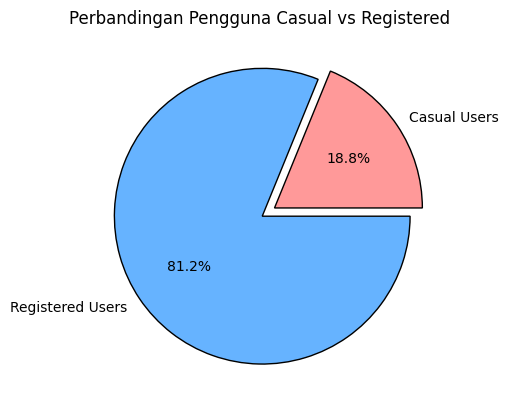

In [23]:
casual_total = df['casual'].sum()
registered_total = df['registered'].sum()


labels = ['Casual Users', 'Registered Users']
sizes = [casual_total, registered_total]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title('Perbandingan Pengguna Casual vs Registered ')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_5148\13422378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='User Type', y='Total Users', data=total_user_type, palette=['#ff9999', '#66b3ff'])


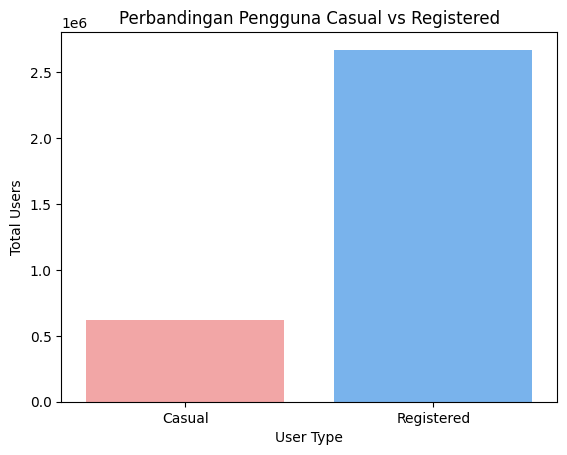

In [24]:
total_user_type = pd.DataFrame({
    'User Type': ['Casual', 'Registered'],
    'Total Users': [df['casual'].sum(), df['registered'].sum()]
})

sns.barplot(x='User Type', y='Total Users', data=total_user_type, palette=['#ff9999', '#66b3ff'])
plt.xlabel('User Type')
plt.ylabel('Total Users')
plt.title('Perbandingan Pengguna Casual vs Registered')
plt.show()

### Pertanyaan 2: Bagaimana pola peminjaman sepeda per bulan dan apakah terdapat perbedaan antara tahun yang berbeda?

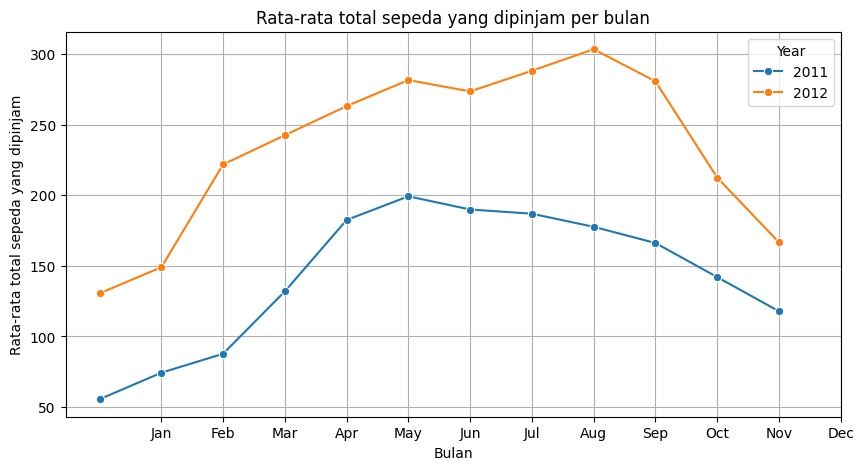

In [25]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df,
    x='month',
    y='count',
    hue='year',
    estimator=np.mean,  
    marker='o',
    errorbar=None,
    palette='tab10'
)
plt.xlabel('Bulan')
plt.ylabel('Rata-rata total sepeda yang dipinjam')
plt.title('Rata-rata total sepeda yang dipinjam per bulan')    
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

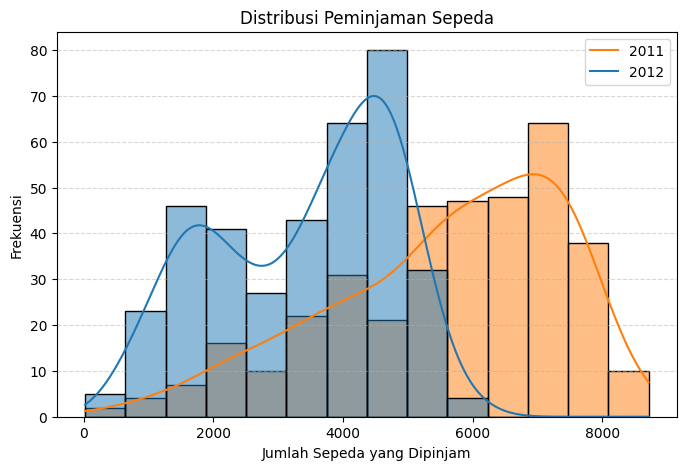

In [26]:
daily_rent_df = df.groupby('dteday').agg({
    'count': 'sum',
    'year': 'first'  # Ambil tahun pertama dari tiap dteday
}).reset_index()

plt.figure(figsize=(8, 5))
sns.histplot(data=daily_rent_df, x='count', kde=True, hue='year', palette='tab10')
plt.xlabel('Jumlah Sepeda yang Dipinjam')
plt.ylabel('Frekuensi')
plt.title('Distribusi Peminjaman Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(['2011', '2012'])
plt.show()

### Pertanyaan 3: Bagaimana perbandingan peminjaman antara musim semi, panas, gugur, dan dingin?

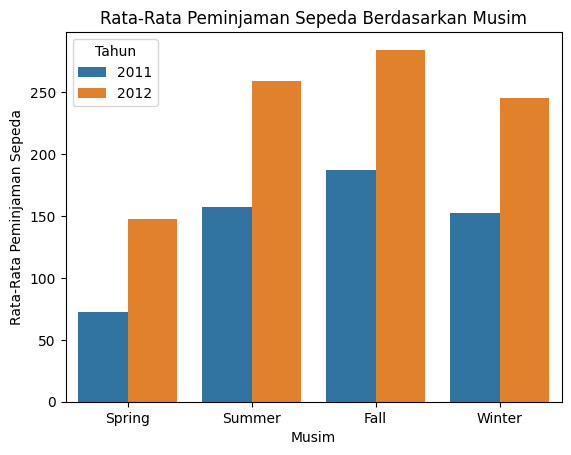

In [27]:
sns.barplot(
    data=df,
    x='season',
    y='count',
    hue='year',
    estimator=np.mean, 
    errorbar=None,
    palette='tab10'
)

plt.xlabel('Musim')
plt.ylabel('Rata-Rata Peminjaman Sepeda')
plt.title('Rata-Rata Peminjaman Sepeda Berdasarkan Musim')

plt.legend(title="Tahun")
plt.show()

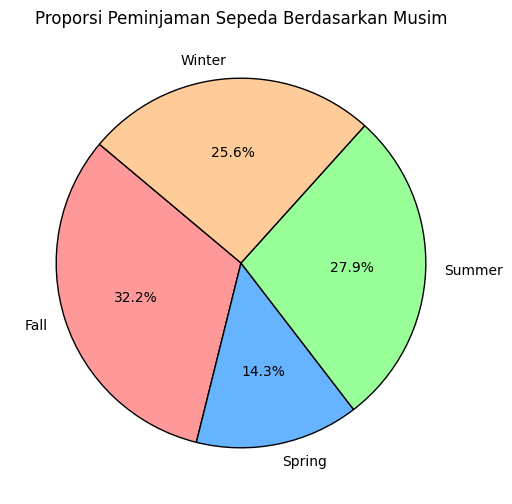

In [28]:
plt.figure(figsize=(6, 6))

season_counts = df.groupby('season')['count'].sum()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.pie(
    season_counts, 
    labels=season_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Proporsi Peminjaman Sepeda Berdasarkan Musim')
plt.show()


### Pertanyaan 4: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

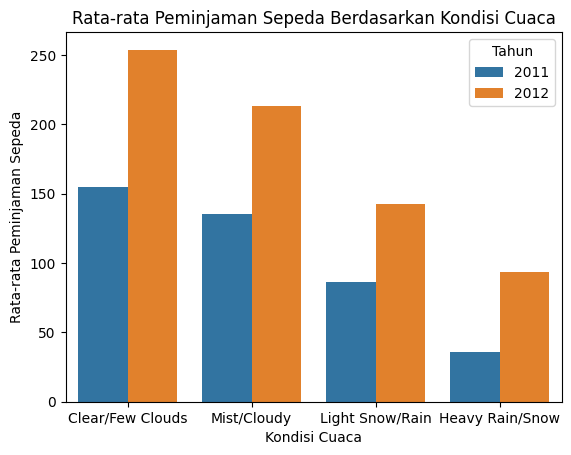

In [29]:
sns.barplot(
    data=df,
    x='weather',
    y='count',
    hue='year',
    estimator=np.mean, 
    errorbar=None,
    palette='tab10'
)

plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca')

plt.legend(title="Tahun")
plt.show()

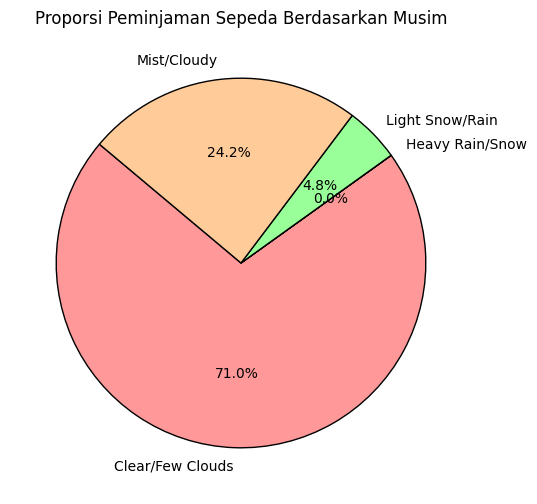

In [30]:
plt.figure(figsize=(6, 6))

weather_counts = df.groupby('weather')['count'].sum()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.pie(
    weather_counts, 
    labels=weather_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Proporsi Peminjaman Sepeda Berdasarkan Musim')
plt.show()


### Pertanyaan 5: Seberapa besar perbedaan peminjaman antara hari kerja dan hari libur?

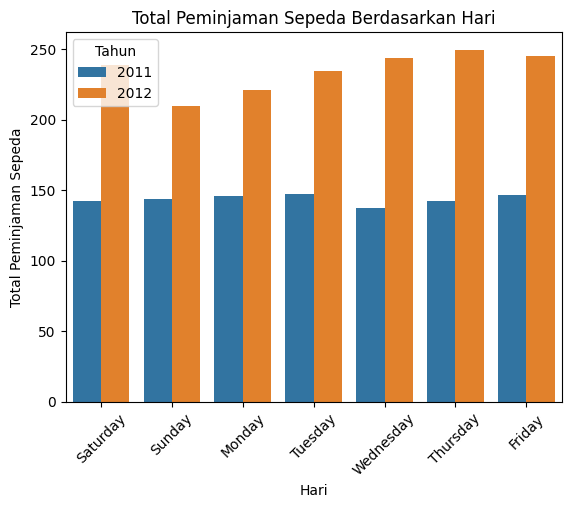

In [31]:
sns.barplot(
    data=df,
    x='weekday',
    y='count',
    hue='year',
    estimator=np.mean,  
    errorbar=None,
    palette='tab10'
)
plt.xlabel('Hari')
plt.ylabel('Total Peminjaman Sepeda')
plt.xticks(rotation=45)
plt.title('Total Peminjaman Sepeda Berdasarkan Hari')
plt.legend(title="Tahun")
plt.show()

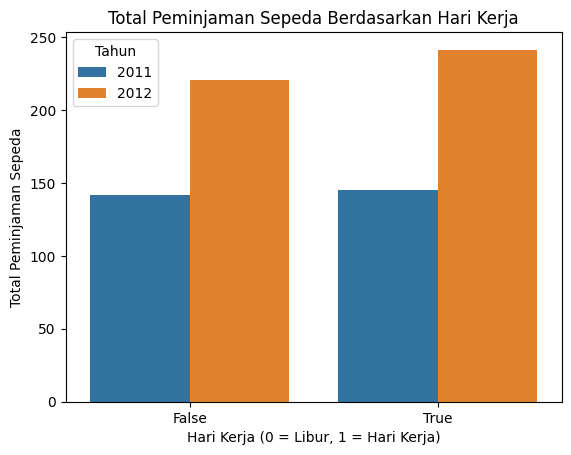

In [32]:
sns.barplot(
    data=df,
    x='workingday',
    y='count',
    hue='year',
    estimator=np.mean,  
    errorbar=None,
    palette='tab10'
)

plt.xlabel('Hari Kerja (0 = Libur, 1 = Hari Kerja)')
plt.ylabel('Total Peminjaman Sepeda')
plt.title('Total Peminjaman Sepeda Berdasarkan Hari Kerja')

plt.legend(title="Tahun")
plt.show()

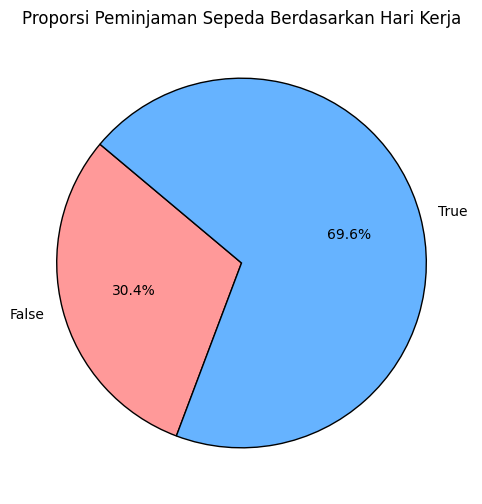

In [33]:
plt.figure(figsize=(6, 6))

workingday_counts = df.groupby('workingday')['count'].sum()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.pie(
    workingday_counts, 
    labels=workingday_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Proporsi Peminjaman Sepeda Berdasarkan Hari Kerja')
plt.show()

### Pertanyaan 6: Bagaimana pengaruh faktor cuaca seperti temperatur, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda?

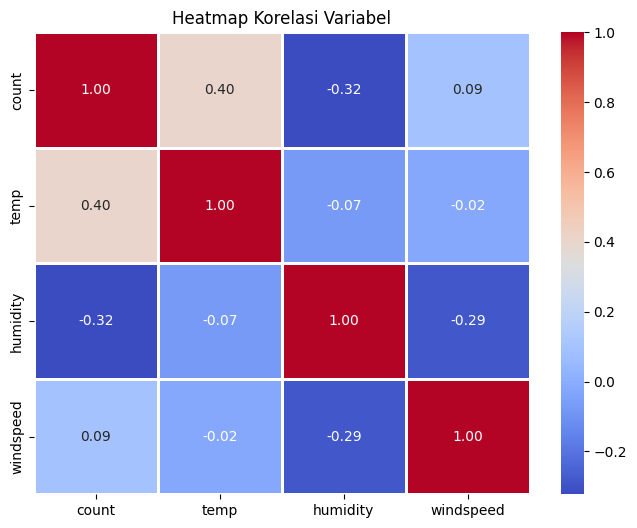

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['count', 'temp', 'humidity', 'windspeed']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=2)
plt.title('Heatmap Korelasi Variabel')
plt.show()

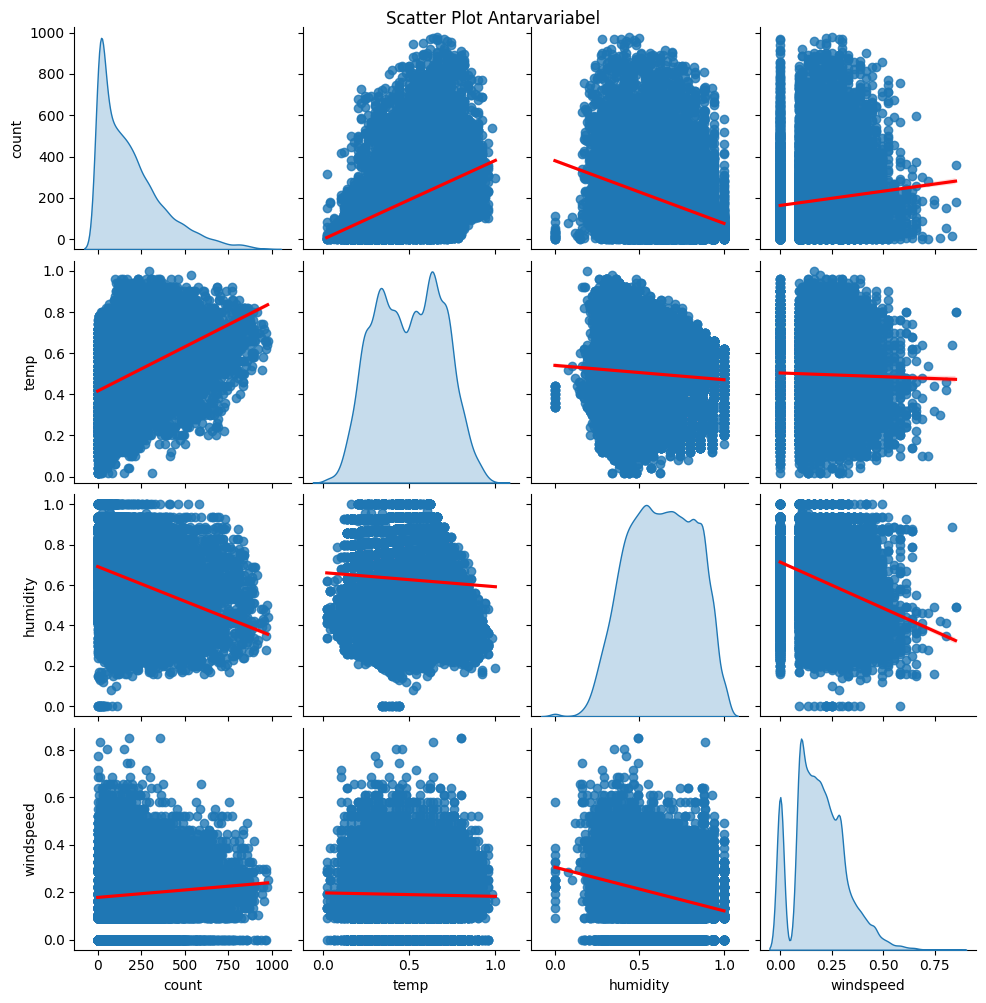

In [35]:
sns.pairplot(df[['count', 'temp', 'humidity', 'windspeed']], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Scatter Plot Antarvariabel', y=1.0)
plt.show()

**Insight:**
- Secara keseluruhan peminjam sepeda terdiri dari 18,8% pengguna kategori casual dan 81,2% pengguna kategori registered 
- Dari line plot diperleh bahwa jumlah peminjam sepeda memiliki pola berulang (musiman) dengan distribusi data pada tahun 2012 yang mulai condong ke kanan (left skewed)
- Secara rata-rata jumlah peminjam sepeda paling sedikit ada pada saat musim semi dan tertinggi pada musim gugur
- Secara rat-rata peminjam sepeda tertinggi ada pada saat cuaca cerah atau sedikit berawan dan terrendah pada saat cuaca hujan lebat atau salju
- Secara rata-rata jumlah peminjam sepeda lebih banyaak saat hari kerja
- jumlah peminjam sepedan memiliki korelasi positif dengan suhu udara dan berkorelasi negatif dengan kelembapan udara

## Analisis Lanjutan (Opsional)

### Analisis Inferensi: Regresi Linear Berganda dengan metode *Ordinary Least Squares* (OLS)

In [36]:
X = df[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']]
y = df['count']
X = sm.add_constant(X)


In [37]:
df_dummies = pd.get_dummies(df, columns=['season', 'holiday', 'workingday', 'weather', 'weekday'], drop_first=True, dtype='int')

df_dummies.columns

Index(['instant', 'dteday', 'year', 'month', 'hour', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count',
       'season_Spring', 'season_Summer', 'season_Winter', 'holiday_True',
       'workingday_True', 'weather_Heavy Rain/Snow', 'weather_Light Snow/Rain',
       'weather_Mist/Cloudy', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [38]:
independent_var = ['temp', 'humidity', 'windspeed',
                   'season_Spring', 'season_Summer', 'season_Winter', 
                   'holiday_True','workingday_True', 
                   'weather_Heavy Rain/Snow', 'weather_Light Snow/Rain', 'weather_Mist/Cloudy']

#### Model 1 (Model Awal)

In [39]:
X = df_dummies[independent_var]
y = df_dummies['count']

X = sm.add_constant(X)

linreg_model = sm.OLS(y, X)
result1 = linreg_model.fit()

print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     624.4
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:31:10   Log-Likelihood:            -1.1215e+05
No. Observations:               17379   AIC:                         2.243e+05
Df Residuals:                   17367   BIC:                         2.244e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<p style="text-align: justify;">Model memiliki R-squared = 0,283, yang berarti 28,3% variasi dalam jumlah peminjaman sepeda dapat dijelaskan oleh variabel dalam model. Namun, masih terdapat parameter yang tidak signifikan, seperti hari kerja dan kondisi cuaca ekstrem. Oleh karena itu, diperlukan reduksi model dengan menghilangkan variabel yang tidak signifikan agar model lebih parsimonious dan interpretatif.</p>


#### Model 2

In [40]:
independent_var = [col for col in independent_var if col not in 
                   ['weather_Heavy Rain/Snow', 'weather_Light Snow/Rain', 'weather_Mist/Cloudy']]

X = df_dummies[independent_var]
y = df_dummies['count']

X = sm.add_constant(X)

linreg_model = sm.OLS(y, X)
result2 = linreg_model.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     851.1
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:31:10   Log-Likelihood:            -1.1217e+05
No. Observations:               17379   AIC:                         2.244e+05
Df Residuals:                   17370   BIC:                         2.244e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              84.7982      9.481     

<p style="text-align: justify;">R-squared = 0,282 yang berarti 28,2% variasi dalam jumlah peminjaman sepeda dapat dijelaskan oleh variabel dalam model. Namun, masih terdapat variabel yang tidak signifikan, seperti hari kerja (<i>workingday_True</i>, p = 0,421). Untuk memperoleh model yang lebih efisien, variabel ini dapat dihapus dalam proses reduksi lanjutan.</p>

#### Model 3 (Model Akhir)

In [41]:
independent_var = [col for col in independent_var if col not in 
                   ['workingday_True']]

X = df_dummies[independent_var]
y = df_dummies['count']

X = sm.add_constant(X)

linreg_model = sm.OLS(y, X)
result2 = linreg_model.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     972.6
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        19:31:10   Log-Likelihood:            -1.1217e+05
No. Observations:               17379   AIC:                         2.244e+05
Df Residuals:                   17371   BIC:                         2.244e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            85.9213      9.378      9.162

<p style="text-align: justify;">
    Persamaan regresi yang diberikan adalah:
</p>

<p style="text-align: center; font-weight: bold;">
    Ŷ = 85,92 + 456,10 ⋅ Temp − 279,21 ⋅ Humidity + 30,85 ⋅ Windspeed + 45,54 ⋅ Season_Spring + 43,42 ⋅ Season_Summer + 101,92 ⋅ Season_Winter − 28,54 ⋅ Holiday
</p>

<h3>Interpretasi Koefisien</h3>

<ul>
    <li><b>Intercept (85,92)</b>: Saat semua variabel independen bernilai nol, jumlah peminjaman sepeda diperkirakan sebesar 85,92 unit.</li>
    <li><b>Temp (456,10)</b>: Setiap kenaikan satu satuan suhu (<i>Temp</i>) akan meningkatkan jumlah peminjaman sepeda sebesar 456,10 unit, dengan asumsi variabel lain tetap.</li>
    <li><b>Humidity (-279,21)</b>: Setiap kenaikan satu satuan kelembapan udara (<i>Humidity</i>) akan menurunkan jumlah peminjaman sepeda sebesar 279,21 unit.</li>
    <li><b>Windspeed (30,85)</b>: Setiap kenaikan satu satuan kecepatan angin (<i>Windspeed</i>) akan meningkatkan jumlah peminjaman sepeda sebesar 30,85 unit.</li>
    <li><b>Season_Spring (45,54)</b>: Pada musim semi, jumlah peminjaman sepeda meningkat sebesar 45,54 unit dibandingkan dengan musim referensi (kemungkinan musim gugur).</li>
    <li><b>Season_Summer (43,42)</b>: Pada musim panas, jumlah peminjaman sepeda meningkat sebesar 43,42 unit dibandingkan dengan musim referensi.</li>
    <li><b>Season_Winter (101,92)</b>: Pada musim dingin, jumlah peminjaman sepeda meningkat sebesar 101,92 unit dibandingkan dengan musim referensi.</li>
    <li><b>Holiday (-28,54)</b>: Saat hari libur, jumlah peminjaman sepeda cenderung berkurang sebesar 28,54 unit dibandingkan dengan hari biasa.</li>
</ul>

<p style="text-align: justify;">Model akhir berhasil menyisakan variabel yang signifikan tanpa mengorbankan banyak informasi dengan nilai R-squared = 0,282 yang berarti 28,2% variasi dalam jumlah peminjaman sepeda dapat dijelaskan oleh variabel dalam model. Masih ada pelanggaran asumsi, terutama autokorelasi dan normalitas residual, yang perlu diperbaiki dengan pendekatan regresi yang lebih sesuai, seperti <i>time series analysis</i> atau model dengan <i>robust standard error</i>. Variabel yang tersisa memiliki interpretasi yang lebih jelas, sehingga model ini lebih sederhana namun tetap menjelaskan faktor utama yang memengaruhi peminjaman sepeda.</p>


## Conclusion

- Conclution pertanyaan 1
<p style="text-align: justify;"> Secara keseluruhan pengguana sepeda kategori registered jauh lebih banyak (81,2%) jika dibandigkan dengan kategori casual (18,8%). </p>

- Conclution pertanyaan 2
<p style="text-align: justify;"> Terdapat pola musiman pada data jumlah peminjaman sepeda, pada bulan januari samapai dengan mei jumlah pengguna sepeda memiliki kecenderungan tren positif (kenaikan), sedangkan pada bulan juni sampai dengan desember jumlah pengguna sepeda cenderung memiliki tren negatif (penurunan). Dari distribusi data diperoleh bahwa terjadi peningkatan pengguna sepeda yang ditandai daengan ddistribusi yang left skewed.</p>

- Conclution Pertanyaan 3
<p style="text-align: justify;"> Secara rata-rata jumlah pengguna sepeda tertinggi ada pada saat musim dan rata-rata jumlah pengguna sepeeda terrendah ada pada saat musim semi. </p>

- Conclution Pertanyaan 4
<p style="text-align: justify;"> Secara rata-rata jumlah pengguna sepeda tertinggi ada pada saat cuaca cerah atau sedikit berawan dan rata-rata jumlah pengguna sepeeda terrendah ada pada saat cuaca hujan lebat atau bersalju. </p>

- Conclution Pertanyaan 5
<p style="text-align: justify;"> Secara rata-rata jumlah pengguna sepeda lebih tinggi pada hari kerja jika dibandingkan dengan saat hari libur. </p>

- Conclution Pertanyaan 6
<p style="text-align: justify;"> Faktor cuaca temperatur memiliki hubungan yang positif sedang (0,40) terhadap jumlah pengguna sepeda dan kelembapan udara memiliki korelasi yang negatif sedang (-0,32) terhadap jumlah pengguna sepeda, sedangkan kecapatan udara memiliki korelasi yang positif sangat lemah (0,09) terhadap jumlah pengguna sepeda. </p>